In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from datetime import datetime, timedelta

In [2]:
J1939 = pd.read_csv('data/J1939Faults.csv')

C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
J1939.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [4]:
code = pd.read_excel('data/Service Fault Codes_1_0_0_167.xlsx')

In [5]:
code.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [6]:
vehicle = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [7]:
vehicle.head()

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1


In [8]:
J1939.drop(['actionDescription', 'ecuSoftwareVersion', 'ecuSerialNumber', 'ecuModel', 'ecuMake', 'faultValue'], axis = 1, inplace = True)

In [9]:
j1939 = J1939
j1939.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [10]:
faults_onboard = j1939.merge(vehicle, how='inner', left_on='RecordID', right_on='Id')
faults_onboard.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,2,990360,2015-02-21 11:34:34.000,NaN,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,2,EngineOilPressure,0,1
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,3,EngineOilTemperature,96.74375,1
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,4,TurboBoostPressure,0,1
4,5,990416,2015-02-21 11:39:41.000,NaN,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,5,EngineLoad,11,1


In [11]:
faults_onboard[faults_onboard['spn'] == 5246]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
45,46,990931,2015-02-21 12:10:51.000,NaN,0,5246,0,True,1,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,46,SwitchedBatteryVoltage,3276.75,6
1918,1919,1007751,2015-02-22 19:44:55.000,NaN,0,5246,0,True,1,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,1919,EngineOilPressure,38.28,212
2058,2059,1010486,2015-02-23 04:00:21.000,NaN,0,5246,0,False,1,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000,2059,BarometricPressure,13.92,226
2089,2090,1011009,2015-02-23 05:05:44.000,NaN,0,5246,0,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,2090,EngineOilPressure,19.72,229
2971,2972,1026305,2015-02-23 15:54:22.000,NaN,0,5246,0,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,2972,EngineLoad,32,324
5713,5714,1070646,2015-02-25 13:53:08.000,NaN,0,5246,0,True,1,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,5714,TurboBoostPressure,1.74,634
5809,5810,1071907,2015-02-25 14:47:00.000,NaN,0,5246,0,False,1,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,5810,BarometricPressure,14.5,643
6534,6535,1097942,2015-02-26 22:24:29.000,NaN,0,5246,0,True,1,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,6535,LampStatus,1023,737
6552,6553,1098750,2015-02-27 01:30:23.000,NaN,0,5246,0,False,1,1419,105355995,37.596851,-85.865601,2015-02-27 01:30:18.000,6553,EngineLoad,28,745
6628,6629,1104361,2015-02-27 09:09:56.000,NaN,0,5246,0,True,1,1486,105338831,40.534259,-76.431805,2015-02-27 09:10:33.000,6629,EngineCoolantTemperature,183.2,750


In [12]:
sample = faults_onboard.head(10)
sample.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,2,990360,2015-02-21 11:34:34.000,NaN,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,2,EngineOilPressure,0,1
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,3,EngineOilTemperature,96.74375,1
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,4,TurboBoostPressure,0,1
4,5,990416,2015-02-21 11:39:41.000,NaN,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,5,EngineLoad,11,1


In [13]:
#sample.drop(["ecuSoftwareVersion", "actionDescription", "ecuModel", "ecuMake", "faultValue"], axis = 1, inplace = True)

In [14]:
faults_onboard[faults_onboard.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
45,46,990931,2015-02-21 12:10:51.000,NaN,0,5246,0,True,1,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,46,SwitchedBatteryVoltage,3276.75,6
1918,1919,1007751,2015-02-22 19:44:55.000,NaN,0,5246,0,True,1,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,1919,EngineOilPressure,38.28,212
2058,2059,1010486,2015-02-23 04:00:21.000,NaN,0,5246,0,False,1,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000,2059,BarometricPressure,13.92,226
2089,2090,1011009,2015-02-23 05:05:44.000,NaN,0,5246,0,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,2090,EngineOilPressure,19.72,229
2971,2972,1026305,2015-02-23 15:54:22.000,NaN,0,5246,0,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,2972,EngineLoad,32,324
5713,5714,1070646,2015-02-25 13:53:08.000,NaN,0,5246,0,True,1,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,5714,TurboBoostPressure,1.74,634
5809,5810,1071907,2015-02-25 14:47:00.000,NaN,0,5246,0,False,1,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,5810,BarometricPressure,14.5,643
6534,6535,1097942,2015-02-26 22:24:29.000,NaN,0,5246,0,True,1,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,6535,LampStatus,1023,737
6552,6553,1098750,2015-02-27 01:30:23.000,NaN,0,5246,0,False,1,1419,105355995,37.596851,-85.865601,2015-02-27 01:30:18.000,6553,EngineLoad,28,745
6628,6629,1104361,2015-02-27 09:09:56.000,NaN,0,5246,0,True,1,1486,105338831,40.534259,-76.431805,2015-02-27 09:10:33.000,6629,EngineCoolantTemperature,183.2,750


In [15]:
failure_error_2 = faults_onboard.spn.isin([5246])
failure_error_2.head()

0    False
1    False
2    False
3    False
4    False
Name: spn, dtype: bool

In [16]:
failure_error = faults_onboard.spn.isin([1569]) & faults_onboard.fmi.isin([31])
failure_error.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [17]:
all_failures = failure_error_2 | failure_error
all_failures.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [18]:
failed_trucks = faults_onboard[all_failures].EquipmentID.astype(str).unique()
failed_trucks

array(['1721', '1395', '1515', '1630', '1487', '1499', '1329', '1365',
       '1419', '1486', '1509', '1492', '1340', '1328', '1430', '1370',
       '1497', '1350', '1473', '1608', '1606', '1612', '1354', '1493',
       '1583', '1465', '1335', '1789', '1383', '1389', '1501', '1438',
       '1463', '1514', '1666', '1689', '1692', '1357', '1396', '310',
       '1602', '1660', '1445', '1431', '105393153', '1327', '1795',
       '1399', '1494', '1367', '1364', '1452', '1595', '1740', '1366',
       '1339', '1425', '1358', '1646', '1391', '1428', '1338', '1637',
       '1346', '1490', '1562', '1433', '1663', '1417', '1424', '1771',
       '1790', '1591', '1797', '1596', '1421', '1547', '1444', '1480',
       '1466', '1457', '105360462', '1794', '1696', '1703', '1626',
       '1715', '1437', '1453', '1584', '1597', '1610', '1377', '1652',
       '105411041', '1517', '1784', '1751', '1786', '1590', '1341',
       '1382', '1714', '1711', '1369', '1398', '1791', '1772', '1472',
       '1418', '

In [19]:
failed_truck_df = faults_onboard[faults_onboard.EquipmentID.isin(failed_trucks)]

In [20]:
failed_truck_df['EventTimeStamp'] = failed_truck_df['EventTimeStamp'].astype('datetime64')

C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
failed_truck_df.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,2,990360,2015-02-21 11:34:34,NaN,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,2,EngineOilPressure,0,1
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,3,EngineOilTemperature,96.74375,1
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,4,TurboBoostPressure,0,1
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,0,111,17,True,1,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,6,AcceleratorPedal,0,1


In [22]:
failed_truck_df = failed_truck_df.sort_values(["EquipmentID", "EventTimeStamp"], ascending = (False, True))
failed_truck_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
19,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,20,SwitchedBatteryVoltage,3276.75,1
20,21,990545,2015-02-21 11:18:20,High Voltage (Left Fuel Level Sensor),49,829,3,True,126,310,105442984,35.485833,-86.466851,2015-02-21 11:47:33.000,21,DistanceLtd,423178.7,1
37,38,990834,2015-02-21 12:05:53,High Voltage (Fuel Level),49,96,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,38,LampStatus,1023,6
38,39,990835,2015-02-21 12:05:53,High Voltage (Left Fuel Level Sensor),49,829,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,39,BarometricPressure,14.4275,6
980615,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,1017355,FuelLevel,67.6,102555
980627,1017367,49986270,2018-05-24 19:09:15,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.588240,-86.443564,2018-05-24 19:09:10.000,1017367,TurboBoostPressure,14.79,102556
980634,1017374,49989777,2018-05-24 19:59:32,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,True,127,310,105442984,35.264768,-86.398101,2018-05-24 20:00:07.000,1017374,EngineRpm,1307.25,102556
980637,1017377,49990362,2018-05-24 20:11:54,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,False,127,310,105442984,35.272824,-86.397268,2018-05-24 20:11:50.000,1017377,Speed,62.36042,102556
980657,1017397,49998664,2018-05-24 23:28:49,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587314,-86.444305,2018-05-24 23:29:25.000,1017397,FuelLevel,67.6,102557
980658,1017398,49999315,2018-05-24 23:50:00,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.587407,-86.443703,2018-05-24 23:49:56.000,1017398,Speed,62.96238,102557


In [23]:
truck_310 = failed_truck_df[failed_truck_df.EquipmentID.isin(['310'])]

In [24]:
truck_310['EventTimeStamp'] = pd.to_datetime(truck_310['EventTimeStamp'])
truck_310['Year'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).year
truck_310['Month'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).month
truck_310

C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
19,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,20,SwitchedBatteryVoltage,3276.75,1,2015,2
20,21,990545,2015-02-21 11:18:20,High Voltage (Left Fuel Level Sensor),49,829,3,True,126,310,105442984,35.485833,-86.466851,2015-02-21 11:47:33.000,21,DistanceLtd,423178.7,1,2015,2
37,38,990834,2015-02-21 12:05:53,High Voltage (Fuel Level),49,96,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,38,LampStatus,1023,6,2015,2
38,39,990835,2015-02-21 12:05:53,High Voltage (Left Fuel Level Sensor),49,829,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,39,BarometricPressure,14.4275,6,2015,2
980615,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,1017355,FuelLevel,67.6,102555,2018,5
980627,1017367,49986270,2018-05-24 19:09:15,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.588240,-86.443564,2018-05-24 19:09:10.000,1017367,TurboBoostPressure,14.79,102556,2018,5
980634,1017374,49989777,2018-05-24 19:59:32,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,True,127,310,105442984,35.264768,-86.398101,2018-05-24 20:00:07.000,1017374,EngineRpm,1307.25,102556,2018,5
980637,1017377,49990362,2018-05-24 20:11:54,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,False,127,310,105442984,35.272824,-86.397268,2018-05-24 20:11:50.000,1017377,Speed,62.36042,102556,2018,5
980657,1017397,49998664,2018-05-24 23:28:49,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587314,-86.444305,2018-05-24 23:29:25.000,1017397,FuelLevel,67.6,102557,2018,5
980658,1017398,49999315,2018-05-24 23:50:00,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.587407,-86.443703,2018-05-24 23:49:56.000,1017398,Speed,62.96238,102557,2018,5


In [25]:
truck_310_2018 = truck_310[truck_310.Year.isin([2018])]
truck_310_2018

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
980615,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,1017355,FuelLevel,67.6,102555,2018,5
980627,1017367,49986270,2018-05-24 19:09:15,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.588240,-86.443564,2018-05-24 19:09:10.000,1017367,TurboBoostPressure,14.79,102556,2018,5
980634,1017374,49989777,2018-05-24 19:59:32,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,True,127,310,105442984,35.264768,-86.398101,2018-05-24 20:00:07.000,1017374,EngineRpm,1307.25,102556,2018,5
980637,1017377,49990362,2018-05-24 20:11:54,Incorrect Data J1939 Network #1 Primary Vehicl...,11,639,2,False,127,310,105442984,35.272824,-86.397268,2018-05-24 20:11:50.000,1017377,Speed,62.36042,102556,2018,5
980657,1017397,49998664,2018-05-24 23:28:49,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587314,-86.444305,2018-05-24 23:29:25.000,1017397,FuelLevel,67.6,102557,2018,5
980658,1017398,49999315,2018-05-24 23:50:00,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,False,127,310,105442984,35.587407,-86.443703,2018-05-24 23:49:56.000,1017398,Speed,62.96238,102557,2018,5
982090,1018830,50388368,2018-05-29 23:32:03,High (Severity Low) Water In Fuel Indicator,0,97,15,True,1,310,105442984,35.385046,-86.407731,2018-05-29 23:32:38.000,1018830,EngineTimeLtd,3973.7,102627,2018,5
982904,1019644,50624186,2018-05-31 14:21:56,High (Severity Medium) Water In Fuel Indicator,0,97,16,True,1,310,105442984,35.588333,-86.443518,2018-05-31 14:22:33.000,1019644,IgnStatus,True,102671,2018,5
983272,1020012,50717951,2018-06-01 12:18:59,High (Severity Medium) Water In Fuel Indicator,0,97,16,False,1,310,105442984,35.587407,-86.443611,2018-06-01 11:28:45.000,1020012,LampStatus,2,102690,2018,6
984359,1021099,50984823,2018-06-04 18:14:39,NaN,0,5394,5,True,1,310,105442984,35.468657,-86.451666,2018-06-04 18:15:15.000,1021099,AcceleratorPedal,83.2,102748,2018,6


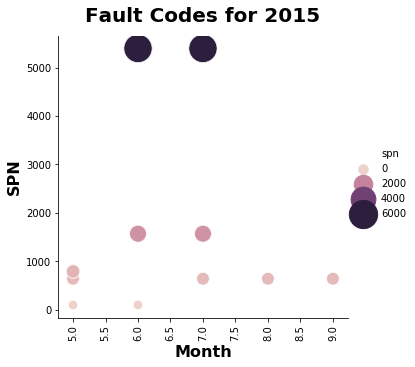

In [26]:
g= sns.relplot(x="Month", y="spn", hue="spn", size="spn", sizes=(90, 800), data=truck_310_2018)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Month', size = 16, weight = 'bold')
g.axes[0,0].set_ylabel('SPN', size = 16, weight = 'bold')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Fault Codes for 2015", size = 20, weight = 'bold');

In [27]:
#plt.scatter(x=truck_310_2015['Month'], y=truck_310_2015['spn'])
#plt.show()

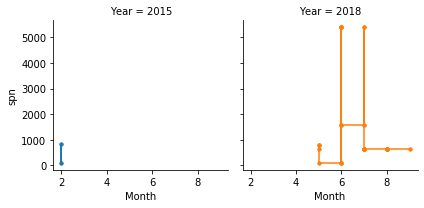

In [28]:
grid = sns.FacetGrid(truck_310, col="Year", hue="Year")
grid.map(plt.plot, "Month","spn", marker='.');

# Convert columns to their appropriate datatypes.
datetimes = ['EventTimeStamp', 'LocationTimeStamp']
failed_truck_df[datetimes] = failed_truck_df[datetimes].astype('datetime64')

strings = ['EquipmentID']
failed_truck_df[strings] = failed_truck_df[strings].astype('str')

#booleans = ['active', 'CruiseControlActive', 'IgnStatus', 'ParkingBrake']
#failed_truck_df[booleans] = (failed_truck_df[booleans]
                    # .fillna(False)
                     #.astype('bool'))

#numbers = list(failed_truck_df.drop(columns = datetimes + strings).columns)
#failed_truck_df[numbers] = (failed_truck_df[numbers]
                    #.replace(',','.', regex=True)
                    #.apply(pd.to_numeric))

# Create date part dimensions.
failed_truck_df['EventTimeStamp_year'] = failed_truck_df['EventTimeStamp'].dt.year
failed_truck_df['EventTimeStamp_month'] = failed_truck_df['EventTimeStamp'].dt.month
failed_truck_df['EventTimeStamp_day'] = failed_truck_df['EventTimeStamp'].dt.day
failed_truck_df['EventTimeStamp_hour'] = failed_truck_df['EventTimeStamp'].dt.hour
failed_truck_df['LocationTimeStamp_year'] = failed_truck_df['LocationTimeStamp'].dt.year
failed_truck_df['LocationTimeStamp_month'] = failed_truck_df['LocationTimeStamp'].dt.month
failed_truck_df['LocationTimeStamp_day'] = failed_truck_df['LocationTimeStamp'].dt.day
failed_truck_df['LocationTimeStamp_hour'] = failed_truck_df['LocationTimeStamp'].dt.hour

# Create target variables for full and partial derates.
failed_truck_df['derate_partial'] = pd.concat([failed_truck_df['spn'] == 1569, failed_truck_df['fmi'] == 31], axis=1).all(axis=1)
failed_truck_df['derate_full'] = failed_truck_df['spn'] == 5246
failed_truck_df['derate_any'] = failed_truck_df[['derate_partial', 'derate_full']].any(axis=1)

In [29]:
failed_truck_df.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
19,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,20,SwitchedBatteryVoltage,3276.75,1
20,21,990545,2015-02-21 11:18:20,High Voltage (Left Fuel Level Sensor),49,829,3,True,126,310,105442984,35.485833,-86.466851,2015-02-21 11:47:33.000,21,DistanceLtd,423178.7,1
37,38,990834,2015-02-21 12:05:53,High Voltage (Fuel Level),49,96,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,38,LampStatus,1023,6
38,39,990835,2015-02-21 12:05:53,High Voltage (Left Fuel Level Sensor),49,829,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,39,BarometricPressure,14.4275,6
980615,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,1017355,FuelLevel,67.6,102555


In [30]:
#failed_truck_df.iloc[:,5].astype('float')

In [31]:
#for column in failed_truck_df:
   # print(column, '\n', failed_truck_df[column].unique(), '\n')

In [32]:
failed_truck_df['Target'] = 0
failure_error_2 = faults_onboard.spn.isin([5246])
failure_error = faults_onboard.spn.isin([1569]) & faults_onboard.fmi.isin([31])
all_failures = failure_error_2 | failure_error
failed_trucks = faults_onboard[all_failures]

In [33]:
failed_trucks['EventTimeStamp'] = pd.to_datetime(failed_trucks['EventTimeStamp'])
failed_trucks['Year'] = pd.DatetimeIndex(failed_trucks['EventTimeStamp']).year
failed_trucks['Month'] = pd.DatetimeIndex(failed_trucks['EventTimeStamp']).month
failed_trucks['6hr_prior'] = failed_trucks['EventTimeStamp'] - timedelta(hours = 6)

C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Foyaz Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [34]:
# return any spn that fall within 6hr_prior and EventTimeStamp of 
for idx, row in failed_trucks.iterrows(): 
    failed_truck_df.loc[(failed_truck_df['EventTimeStamp'] > row['6hr_prior']) &
    (failed_truck_df['EventTimeStamp'] < row['EventTimeStamp']) &
    (failed_truck_df['EquipmentID'] == row['EquipmentID']), 'Target'] = 1

In [35]:
failed_truck_df.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Target
19,20,990544,2015-02-21 11:18:20,High Voltage (Fuel Level),49,96,3,True,126,310,105442984,35.485787,-86.466712,2015-02-21 11:47:32.000,20,SwitchedBatteryVoltage,3276.75,1,0
20,21,990545,2015-02-21 11:18:20,High Voltage (Left Fuel Level Sensor),49,829,3,True,126,310,105442984,35.485833,-86.466851,2015-02-21 11:47:33.000,21,DistanceLtd,423178.7,1,0
37,38,990834,2015-02-21 12:05:53,High Voltage (Fuel Level),49,96,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,38,LampStatus,1023,6,0
38,39,990835,2015-02-21 12:05:53,High Voltage (Left Fuel Level Sensor),49,829,3,False,126,310,105442984,35.586712,-86.443379,2015-02-21 12:05:48.000,39,BarometricPressure,14.4275,6,0
980615,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,11,789,2,True,127,310,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,1017355,FuelLevel,67.6,102555,0


In [69]:
failed_truck_df[failed_truck_df['Target'] == 1].spn.value_counts(ascending = False)

1761      259
1569      249
3364      106
5246       49
3031       46
639        29
111        27
3362       26
3226       25
4334       20
1209       20
929        19
3703       18
3216       16
3363       16
5743       15
102        15
4094       15
641        14
3251       14
5835       12
5742       12
1231       10
4376        9
5394        9
789         8
3361        8
96          8
5491        7
50353       6
         ... 
1668        2
175         2
3513        2
4339        2
4340        2
5397        2
790         2
4364        2
4344        2
2791        2
596         2
611         2
649         2
51923       2
411         1
74          1
81          1
862         1
94          1
3821        1
100         1
3698        1
105         1
1172        1
5109        1
3217        1
630         1
523531      1
4360        1
65535       1
Name: spn, Length: 81, dtype: int64

In [37]:
failed_truck_df[failed_truck_df['Target'] == 1]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Target
992315,1030974,53580032,2018-06-28 21:51:13,NaN,0,5394,5,True,2,310,105442984,35.577592,-86.443148,2018-06-28 21:51:50.000,1030974,AcceleratorPedal,100,103513,1
992316,1030975,53580417,2018-06-28 22:03:41,Condition Exists Engine Protection Torque Derate,0,1569,31,True,1,310,105442984,35.479490,-86.458703,2018-06-28 22:04:16.000,1030975,TurboBoostPressure,1.45,103513,1
992363,1031022,53601768,2018-06-29 06:22:38,NaN,0,5394,5,False,2,310,105442984,35.587500,-86.443981,2018-06-29 06:22:34.000,1031022,IntakeManifoldTemperature,113,103517,1
992373,1031032,53603242,2018-06-29 06:39:44,NaN,0,5394,5,True,3,310,105442984,35.588425,-86.444027,2018-06-29 06:40:19.000,1031032,EngineCoolantTemperature,192.2,103517,1
992386,1031045,53606951,2018-06-29 07:15:24,Condition Exists Engine Protection Torque Derate,0,1569,31,True,2,310,105442984,35.588425,-86.444074,2018-06-29 07:16:03.000,1031045,EngineRpm,647,103518,1
992425,1031084,53615141,2018-06-29 08:29:43,Condition Exists Engine Protection Torque Derate,0,1569,31,False,2,310,105442984,35.588472,-86.443796,2018-06-29 08:29:39.000,1031084,FuelTemperature,32,103523,1
993012,1031671,53835654,2018-07-02 05:59:38,Condition Exists Engine Protection Torque Derate,0,1569,31,False,1,310,105442984,35.587592,-86.443935,2018-07-02 06:01:02.000,1031671,DistanceLtd,455689,103593,1
993015,1031674,53836019,2018-07-02 06:06:35,NaN,0,5394,5,False,1,310,105442984,35.588009,-86.443888,2018-07-02 06:06:31.000,1031674,EngineOilTemperature,215.9937,103594,1
993044,1031703,53842814,2018-07-02 07:25:23,NaN,0,5394,5,True,1,310,105442984,35.588101,-86.443703,2018-07-02 07:25:59.000,1031703,FuelRate,0.8189359,103596,1
993045,1031704,53842815,2018-07-02 07:25:23,Condition Exists Engine Protection Torque Derate,0,1569,31,True,1,310,105442984,35.588101,-86.443703,2018-07-02 07:25:59.000,1031704,EngineRpm,704,103596,1


In [62]:
failed_truck_df[failed_truck_df['spn'] == (5246,1569)] #or failed_truck_df[failed_truck_df['spn'] == 5246]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Target


In [63]:
failed_truck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48636 entries, 19 to 1012450
Data columns (total 19 columns):
RecordID                 48636 non-null int64
ESS_Id                   48636 non-null int64
EventTimeStamp           48636 non-null datetime64[ns]
eventDescription         46103 non-null object
ecuSource                48636 non-null int64
spn                      48636 non-null int64
fmi                      48636 non-null int64
active                   48636 non-null bool
activeTransitionCount    48636 non-null int64
EquipmentID              48636 non-null object
MCTNumber                48636 non-null int64
Latitude                 48636 non-null float64
Longitude                48636 non-null float64
LocationTimeStamp        48636 non-null object
Id                       48636 non-null int64
Name                     48636 non-null object
Value                    48636 non-null object
FaultId                  48636 non-null int64
Target                   48636 non-null int

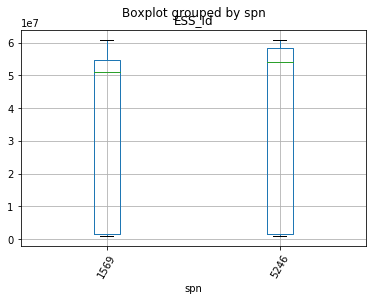

In [68]:
failed_truck_df[(failed_truck_df.spn == 1569)|(failed_truck_df.spn == 5246)].boxplot('ESS_Id', 'spn', rot = 60)

In [83]:
x = failed_truck_df[failed_truck_df['Target'] == 1].spn.value_counts(ascending = False).head()
x

1761    259
1569    249
3364    106
5246     49
3031     46
Name: spn, dtype: int64

In [88]:
x = pd.DataFrame(x)
x

,spn
1761,259
1569,249
3364,106
5246,49
3031,46


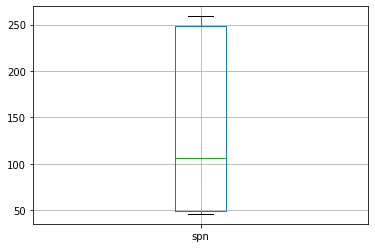

In [87]:
x.boxplot()